<a href="https://colab.research.google.com/github/smagara/LangGraph-Coursework/blob/main/langgraph_simplechatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Continue LangGraph course

# Simple ChatBot example

1.   Define State structure with a list of HumanMessage objects
2.   Initialize a GPT-4o modeule using LangChain ChatOpenAI
3.   Handle sending and handling different types of messages
4.   Build and compile this "Agent" graph

Main Goal: Learn how to integrate LLMs in Graphs

START -> ProcessNode -> END

---

In [44]:
## installs
%pip install -U langgraph

In [45]:
%pip install -U langchain-openai

In [46]:
%pip install python-dotenv

In [47]:
## Setup imports
from typing import TypedDict, Dict, List, TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display
import random

from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage, AIMessage
from dotenv import load_dotenv
from google.colab import userdata

In [48]:
load_dotenv()

False

In [62]:
## Color codes for more interesting markdown output
magenta_color_code = "\033[95m"
green_color_code = "\033[32m"
reset_color_code = "\033[0m"
red_color_code = "\033[91m"

In [63]:
class AgentState(TypedDict):
    messages: List[HumanMessage]

In [64]:
# Integrate an AI LLM
openAIkey = userdata.get('OPENAI_API_KEY')
llm = ChatOpenAI(model_name="gpt-4o", openai_api_key=openAIkey)


In [65]:
def process(state: AgentState) -> AgentState:
    ### Process the user messages on the LLM and get the response ###
    response = llm.invoke(state["messages"])
    print(green_color_code)
    print("_" * 80)
    print(f"\nAI: {response.content}")
    print("_" * 80)
    print(reset_color_code)
    state["messages"].append(AIMessage(content=response.content))
    return state

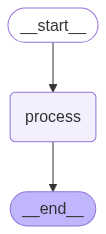

In [66]:
## build our LangGraph
graph = StateGraph(AgentState)
graph.add_node("process", process)
graph.add_edge(START, "process")
graph.add_edge("process", END)
agent = graph.compile()

# display mermaid graph
display(Image(agent.get_graph().draw_mermaid_png()))

In [68]:
## prompt the user for questions for the AI until they type "exit"
## ask an ambiguous followup question that should be clear from context to test history
## display user questions in magenta, responses in green markdown
print(magenta_color_code)
user_input = input("What is your question: ")
conversation_history = []
while user_input != "exit":
    conversation_history.append(HumanMessage(content=user_input))
    result = agent.invoke({"messages": conversation_history})
    conversation_history = result["messages"]
    print(magenta_color_code)
    user_input = input("What is your question: ")

print(reset_color_code)
print("Finished.")


What is your question: what is rna

________________________________________________________________________________

AI: RNA, or ribonucleic acid, is a crucial molecule involved in various biological processes within cells. It is structurally similar to DNA but is typically single-stranded and contains the sugar ribose instead of deoxyribose. RNA also uses the base uracil in place of thymine, which is found in DNA.

There are several types of RNA, each serving different functions:

1. **Messenger RNA (mRNA):** This type carries genetic information from DNA to the ribosomes, where proteins are synthesized. It acts as a template for assembling amino acids in the correct order to form a specific protein.

2. **Ribosomal RNA (rRNA):** A key component of ribosomes, rRNA helps to catalyze the assembly of proteins by aligning mRNA and tRNA during protein synthesis.

3. **Transfer RNA (tRNA):** tRNA transports the appropriate amino acids to the ribosome during protein synthesis, matching the